<a href="https://colab.research.google.com/github/vikramkrishnan9885/MyColab/blob/master/BasicsOfPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and stuff

In [1]:
import torch
print(torch.__version__)

1.5.0+cu101


In [2]:
import torchvision
print(torchvision.__version__)

0.6.0+cu101


In [3]:
torch.cuda.is_available()

True

In [4]:
torch.cuda.device_count()

1

In [5]:
# get cuda/gpu device id
torch.cuda.current_device()

0

In [6]:
# get cuda/gpu device name
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

## Import datasets

In [7]:
from torchvision import datasets

# path to store data and/or load from
path2data="./data"

# loading training data
train_data=datasets.MNIST(path2data, train=True, download=True)

# extract data and targets
x_train, y_train=train_data.data,train_data.targets
print(x_train.shape)
print(y_train.shape)

# loading validation data
val_data=datasets.MNIST(path2data, train=False, download=True)

# extract data and targets
x_val,y_val=val_data.data, val_data.targets
print(x_val.shape)
print(y_val.shape)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!
torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])
torch.Size([10000])


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.




torch.Size([60000, 1, 28, 28])
torch.Size([3, 152, 242])


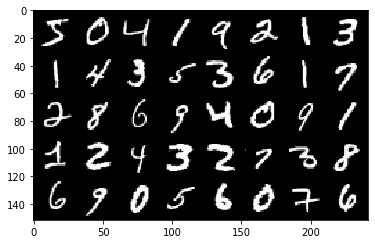

In [8]:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# First, add a dimension to tensor to become B*C*H*W
if len(x_train.shape)==3:
    x_train=x_train.unsqueeze(1)
print(x_train.shape)

if len(x_val.shape)==3:
    x_val=x_val.unsqueeze(1)

# make a grid of 40 images, 8 images per row
x_grid=utils.make_grid(x_train[:40], nrow=8, padding=2)
print(x_grid.shape)

# helper function to display images
def show(img):
    # convert tensor to numpy array
    npimg = img.numpy()
    
    # Convert to H*W*C shape
    npimg_tr=np.transpose(npimg, (1,2,0))
    
    # display images
    plt.imshow(npimg_tr,interpolation='nearest')

# call helper function
show(x_grid)

# Transformations

Text(0.5, 1.0, 'transformed')

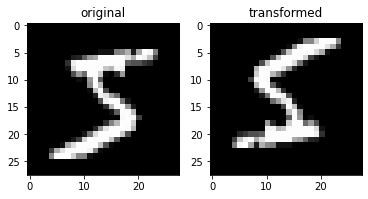

In [9]:
from torchvision import transforms

# loading MNIST training dataset
train_data=datasets.MNIST(path2data, train=True, download=True)

# define transformations
data_transform = transforms.Compose(
    [
      transforms.RandomHorizontalFlip(p=1),
      transforms.RandomVerticalFlip(p=1),
      transforms.ToTensor(),
    ]
)

# get a sample image from training dataset
img = train_data[0][0]

# tranform sample image
img_tr=data_transform(img)

# convert tensor to numpy array
img_tr_np=img_tr.numpy()

# show original and transformed images
plt.subplot(1,2,1)
plt.imshow(img,cmap="gray")
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(img_tr_np[0],cmap="gray");
plt.title("transformed")

## Wrapping tensors into a dataset

If your data is available in tensors, you can wrap them as a PyTorch dataset using the TensorDataset class. This will make it easier to iterate over data during training.

In [10]:
from torch.utils.data import TensorDataset

# wrap tensors into a dataset
train_ds = TensorDataset(x_train, y_train)
val_ds = TensorDataset(x_val, y_val)

for x,y in train_ds:
  print(x.shape,y.item())    
  break

torch.Size([1, 28, 28]) 5


## Creating data loaders
To easily iterate over the data during training, we can create a data loader using the DataLoader class

In [11]:
from torch.utils.data import DataLoader

# create a data loader from dataset
train_dl = DataLoader(train_ds, batch_size=8)
val_dl = DataLoader(val_ds, batch_size=8)

# iterate over batches
for xb,yb in train_dl:
    print(xb.shape)
    print(yb.shape)
    break
    # your training code will be here!

torch.Size([8, 1, 28, 28])
torch.Size([8])


# Building Models

We will define a linear layer, a two-layer network, and a multilayer convolutional network

In [12]:
from torch import nn

# input tensor dimension 64*1000
input_tensor = torch.randn(64, 1000)

# linear layer with 1000 inputs and 100 outputs
linear_layer = nn.Linear(1000, 100)

# output of the linear layer
output = linear_layer(input_tensor)
print(output.size())

torch.Size([64, 100])


## Sequential Models

In [13]:
from torch import nn

# define a two-layer model
model = nn.Sequential(
                        nn.Linear(4, 5),
                        nn.ReLU(), # relu is not shown in the figure.
                        nn.Linear(5, 1),)
print(model)

Sequential(
  (0): Linear(in_features=4, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
)


## Define models using nn.Module

In [14]:
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 5, 1)
        self.conv2 = nn.Conv2d(8, 16, 5, 1)
        self.fc1 = nn.Linear(4*4*16, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = Net()
print(model)

Net(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [15]:
# we will move the model to the CUDA device:
device = torch.device("cuda:0")
model.to(device)
print(next(model.parameters()).device)

cuda:0


In [16]:
# Show model summary

from torchsummary import summary

summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 24, 24]             208
            Conv2d-2             [-1, 16, 8, 8]           3,216
            Linear-3                  [-1, 100]          25,700
            Linear-4                   [-1, 10]           1,010
Total params: 30,134
Trainable params: 30,134
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.11
Estimated Total Size (MB): 0.16
----------------------------------------------------------------


## Defining the loss function and optimizer
The loss function computes the distance between the model outputs and targets.It is also called the objective function, cost function, or criterion. Depending on the problem, we will define the appropriate loss function. For instance, for classification problems, we usually define the cross-entropy loss. 

We use the optimizer to update the model parameters (also called weights) during training. The optim package in PyTorch provides implementations of various optimization algorithms. These include stochastic gradient descent (SGD) and its variants, that is, Adam, RMSprop, and so on.

In [17]:
# Loss Function

# define the negative log likelihood loss
loss_func = nn.NLLLoss(reduction="sum")

for xb, yb in train_dl:
    # move batch to cuda device
    xb=xb.type(torch.float).to(device)
    yb=yb.to(device)
    # get model output
    out=model(xb)
    # calculate loss value
    loss = loss_func(out, yb)
    print (loss.item())
    break

131.11544799804688


In [0]:
# compute gradients
loss.backward()

In [0]:
# We will define the optimizer and present the steps backward. Let's get started:

# 1. Let's define the Adam optimizer:
from torch import optim
opt = optim.Adam(model.parameters(), lr=1e-4)

# 2. Use the following code to update the model parameters:
# update model parameters
opt.step()

# 3.Next, we set the gradients to zero:
# set gradients to zero
opt.zero_grad()

## Loss Functions
1. First, we defined the loss function. 
2. We used the torch.nn package to define the negative log-likelihood loss. 
3. This loss is useful for training a classification problem with multiple classes. 
4. The input to this loss function should be log-probabilities.
5. We applied log_softmax at the output layer to get log-probabilities from the model. 
6. Next, we presented the forward path. 
7. We extracted a mini-batch, fed it to the model, and calculated the loss value. 
8. Next, we used the .backward method to compute the gradients of the loss with respect to the model parameters. 
9. This step will be used during the backpropagation algorithm.

## Optimizers
1. Next, we define the Adam optimizer. 
2. The inputs to the optimizer are the model parameters and the learning rate. 
3. Then, we presented the .step() model to automatically update the model parameters. 
4. Don't forget to set the gradients to zero before computing the gradients of the next batch.

## Let's develop a helper function to compute the loss value per mini-batch:

In [0]:
def loss_batch(loss_func, xb, yb,yb_h, opt=None):
    
    # obtain loss
    loss = loss_func(yb_h, yb)
    
    # obtain performance metric
    metric_b = metrics_batch(yb,yb_h)
    
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), metric_b

## Next, we will define a helper function to compute the accuracy per mini-batch:

In [0]:
def metrics_batch(target, output):
    # obtain output class
    pred = output.argmax(dim=1, keepdim=True)
    
    # compare output class with target class
    corrects=pred.eq(target.view_as(pred)).sum().item()
    return corrects

## Next, we will define a helper function to compute the loss and metric values for a dataset:

In [0]:
def loss_epoch(model,loss_func,dataset_dl,opt=None):
    loss=0.0
    metric=0.0
    len_data=len(dataset_dl.dataset)
    for xb, yb in dataset_dl:
        xb=xb.type(torch.float).to(device)
        yb=yb.to(device)
        
        # obtain model output
        yb_h=model(xb)

        loss_b,metric_b=loss_batch(loss_func, xb, yb,yb_h, opt)
        loss+=loss_b
        if metric_b is not None:
            metric+=metric_b
    loss/=len_data
    metric/=len_data
    return loss, metric

## Finally, we will define the train_val function:

In [0]:
def train_val(epochs, model, loss_func, opt, train_dl, val_dl):
    for epoch in range(epochs):
        model.train()
        train_loss, train_metric=loss_epoch(model,loss_func,train_dl,opt)
        
            
        model.eval()
        with torch.no_grad():
            val_loss, val_metric=loss_epoch(model,loss_func,val_dl)
        
        accuracy=100*val_metric

        print("epoch: %d, train loss: %.6f, val loss: %.6f, accuracy: %.2f" %(epoch, train_loss,val_loss,accuracy))

In [24]:
# call train_val function
num_epochs=5
train_val(num_epochs, model, loss_func, opt, train_dl, val_dl)

epoch: 0, train loss: 0.276224, val loss: 0.126370, accuracy: 96.10
epoch: 1, train loss: 0.076624, val loss: 0.084459, accuracy: 97.35
epoch: 2, train loss: 0.051226, val loss: 0.061729, accuracy: 97.99
epoch: 3, train loss: 0.037105, val loss: 0.052697, accuracy: 98.39
epoch: 4, train loss: 0.027392, val loss: 0.048339, accuracy: 98.57


# Storing and loading models

## Method 1

### First, we will store the model parameters or state_dict in a file:

In [0]:
import torch

# define path2weights
path2weights="./weights.pt"

# store state_dict to file
torch.save(model.state_dict(), path2weights)

### To load the model parameters from the file, we will define an object of the Net class:


In [0]:
# define model: weights are randomly initiated
_model = Net()

### Then, we will load state_dict from the file:



In [0]:
weights=torch.load(path2weights)

### Next, we will set state_dict to the model:

In [28]:
_model.load_state_dict(weights)

<All keys matched successfully>

## Method 2

1. Instead of saving `model.state_dict()` save `model`. 
2. Likewise instead of `_model.load_state_dict(weights)` use `_model=torch.load(path2model)`

In [29]:
# define a path2model
path2model="./model.pt"

# store model and weights into local file
torch.save(model,path2model)

# define model: weights are randomly initiated
_model = Net()

# load model and weights from local file
_model=torch.load(path2model)

# set model in eval mode for deployment
_model.eval()

# move model to cuda device for accelerated computation
_model.to(device)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Net(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

# Deploying the model

torch.Size([1, 28, 28])
6 6


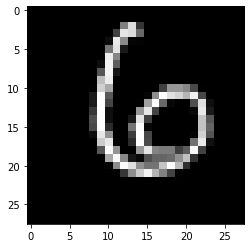

In [30]:
# x is a data point with C*H*W shape
n=100
x= x_val[n]
y=y_val[n]
print(x.shape)
plt.imshow(x.numpy()[0],cmap="gray")

# we use unsqueeze to expand dimensions to 1*C*H*W
x= x.unsqueeze(0)

# convert to torch.float32
x=x.type(torch.float)

# move to cuda device
x=x.to(device)

# get model output
output=_model(x)

# get predicted class
pred = output.argmax(dim=1, keepdim=True)
print (pred.item(),y.item())